#### Hypothesis Testing with Insurance Data (Core)
- Paula Pipkin

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

In [57]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [17]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1  Do smokers have higher insurance charges than non-smokers?

- State your Null Hypothesis and Alternative Hypothesis

        -Null - Smokers and not smokers have the same insurance charges
        -Alternative - Charges differs between smokers and no smokers

- Select the correct test according to the data type and number of samples

        - T-Test 2 groups - independent


In [18]:
no_smoker = df.loc[ df['smoker']=='no',"charges"]
smoker = df.loc[ df['smoker']=='yes',"charges"]

## Getting means 
print(f"For smokers (n={len(smoker)}): Mean={np.mean(smoker):.2f}")
print(f"For not smoker (n={len(no_smoker)}): Mean={np.mean(no_smoker):.2f}")

For smokers (n=274): Mean=32050.23
For not smoker (n=1064): Mean=8434.27


- Test the assumptions of your selected test.


In [19]:
# Outliers?
zscores_s = stats.zscore(smoker)
outliers_s = abs(zscores_s)>3
print(f'Smokers outliers: {np.sum(outliers_s)}')

zscores_ns = stats.zscore(no_smoker)
outliers_ns = abs(zscores_ns)>3
print(f'NOT Smokers outliers: {np.sum(outliers_ns)}')

Smokers outliers: 0
NOT Smokers outliers: 24


In [20]:
# remove outliers from not smokers
no_smoker = no_smoker[(np.abs(stats.zscore(no_smoker)) < 3)]



In [22]:
#Test for normality

result_s = stats.normaltest(smoker)
result_s[1]>0.05



False

In [23]:
result_ns = stats.normaltest(no_smoker)
result_ns[1]>0.05

False

In [24]:
#Both are not normal (p < alpha) but both samples are largers than 30 so I'll proceed

In [25]:
result = stats.levene(smoker, no_smoker)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [ ]:
#No equal variance so I will apply the test using equal_var = False


- Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [27]:
## Final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(no_smoker, smoker, equal_var = False )
result



Ttest_indResult(statistic=-33.732305987092516, pvalue=2.575322662587431e-104)

- Interpret your p-value and reject or fail to reject your null hypothesis 


In [ ]:
# P value is smaller than alpha, there is significant result to reject the null 
#  hipotesis, we can affirm that there is a difference between the charges for smokers and no smokers

- Show a supporting visualization that helps display the result

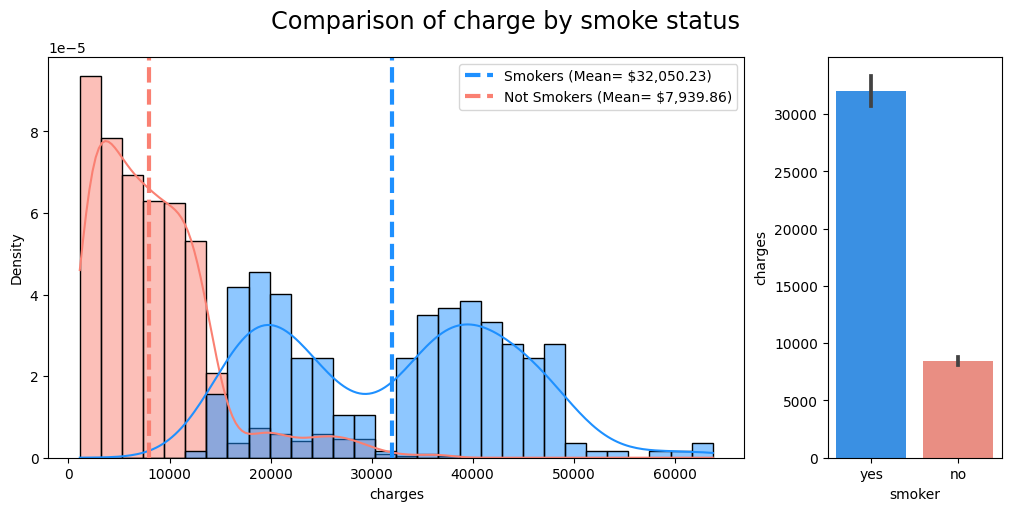

In [41]:
palette={'yes':'dodgerblue', 'no':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=palette)

ax.axvline(np.mean(smoker), ls='--',lw=3, 
           label=f"Smokers (Mean= ${np.mean(smoker):,.2f})",color=palette['yes'])

ax.axvline(np.mean(no_smoker), ls='--', lw=3, 
           label=f"Not Smokers (Mean= ${np.mean(no_smoker):,.2f})",color=palette['no'])

ax.legend(prop={"size":10}, loc='upper right')

## Barplot

sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=palette)
fig.suptitle('Comparison of charge by smoke status',fontsize='xx-large');

### Q2  Are men more likely to smoke than women?

- State your Null Hypothesis and Alternative Hypothesis

        -Null - Men and Women smoke at the same rate
        -Alternative - smoking rates differ between men and women

- Select the correct test according to the data type and number of samples

        - Chi-Square 2 groups - categorical


- Assumptions 

    - There are two categorical variables (ordinal or nominal) [x]
    - The outcomes are independent[x]

- Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [43]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table



smoker,no,yes
sex,,
female,547,115
male,517,159


In [44]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

print(p>0.05)

False


This means that we accept the alternate hypothesis and conclude that there is a relationship between a gender and smoking.

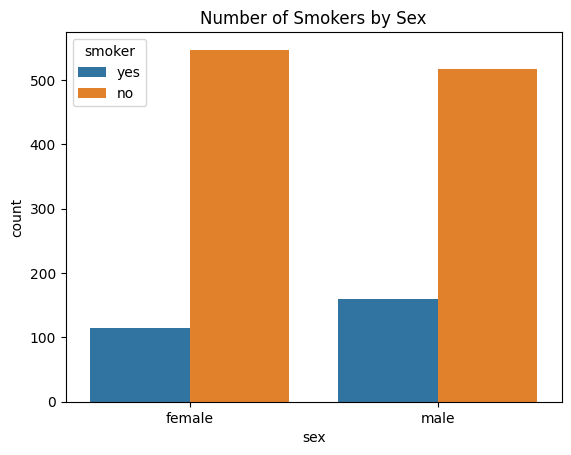

In [45]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");



### Q3 Do different regions have different charges, on average?

- State your Null Hypothesis and Alternative Hypothesis

        -Null - different regions have the same insurance charges on average
        -Alternative - Charges differs from region to region

- Select the correct test according to the data type and number of samples

        - ANOVA and/or Tukey - Many numerical groups


In [47]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

- Test the assumptions of your selected test.

In [49]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [54]:
#No significant outliers
#Equal variance
#Normality

## Running normal test on each group and confirming there are >20 in each group

norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,'mean':np.mean(data)}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T #T for transpose row vs cols
norm_results_df



,n,p,test stat,mean
southwest,325.0,6.125298e-23,102.294059,12346.937377
southeast,364.0,4.953297e-15,65.877446,14735.411438
northwest,325.0,5.184209e-24,107.232850,12417.575374
northeast,324.0,1.455431e-19,86.747629,13406.384516


In [51]:
# none of the groups has a normal distribution but they are all large enough

In [52]:
# with the * operator 
stats.levene(*groups.values())


LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [53]:
# no nomrmality I will use

In [55]:

results = stats.kruskal(*groups.values())
results


KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

In [58]:
# Now that we KNOW we have significant differences, we are allowed to perform pairwise comparisons between every group.


## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']



In [59]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


In [62]:
# The only significant difference is between southwest and southeast according to the tukey test

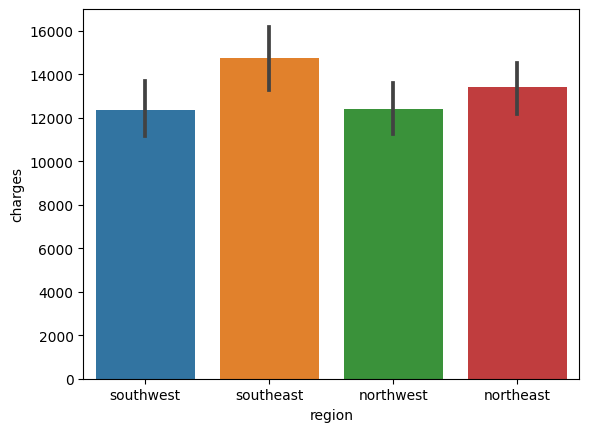

In [60]:
sns.barplot(data=df, x='region',y='charges');

